In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("/home/rahmat/Desktop/ML_Projects/heart.csv")
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [25]:
x1 = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].values
y= data['output'].values

In [31]:
x1 = data['age'].values
x1s=x1/np.max(x1)

x2 = data['sex'].values
x2s=x2/np.max(x2)

x3 = data['cp'].values
x3s = x3/np.max(x3)

x4 = data['trtbps'].values
x4s = x4/np.max(x4)

x5 = data['chol'].values
x5s = x5/np.max(x5)

x6 = data['restecg'].values
x6s = x6/np.max(x6)

x7 = data['thalachh'].values
x7s=x7/np.max(x7)

x8 = data['exng'].values
x8s=x8/np.max(x8)

x9 = data['oldpeak'].values
x9s = x9/np.max(x9)

x10 = data['slp'].values
x10s = x10/np.max(x10)

x11 = data['caa'].values
x11s = x11/np.max(x11)

x12 = data['thall'].values
x12s = x12/np.max(x12)

m = len(x1s)
x0 = np.ones(m)

X = np.array([x0, x1s, x2s, x3s, x4s, x5s, x6s, x7s, x8s, x9s, x10s, x11s, x12s]).T

theta = np.zeros(X.shape[1])


X = X[:, :2]

xtrain, xtest ,ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=12)
xtrain[0].shape



(13,)

In [14]:
def distance_formula(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn(xtrain, ytrain, xtest, k):
    predictions = []
    for i in xtest:
        distances = []
        for j in range(len(xtrain)):
            dist = distance_formula(xtrain[j], i)
            distances.append((dist, ytrain[j]))
        
        # Sort distances by the first element (the distance)
        distances.sort()
        
        
        # Get the labels of the k nearest neighbors
        k_nearest = [label for _, label in distances[:k]]
        
        # Determine the most common label (majority vote)
        prediction = statistics.mode(k_nearest)
       
        
        # Append prediction for the current test point
        predictions.append(prediction)
    print(distances)
    
    return predictions

In [15]:
# Predict using k-NN
k = 5
predictions = knn(xtrain, ytrain, xtest, k)
print("Predictions:", predictions)

[(0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 1), (0.0, 1), (0.0, 1), (0.012987012987012991, 0), (0.012987012987012991, 0), (0.012987012987012991, 0), (0.012987012987012991, 0), (0.012987012987012991, 0), (0.012987012987012991, 0), (0.012987012987012991, 0), (0.012987012987012991, 0), (0.012987012987012991, 0), (0.012987012987012991, 0), (0.012987012987012991, 0), (0.012987012987012991, 0), (0.012987012987012991, 0), (0.012987012987012991, 0), (0.012987012987012991, 0), (0.012987012987012991, 1), (0.012987012987012991, 1), (0.012987012987012991, 1), (0.012987012987012991, 1), (0.012987012987012991, 1), (0.012987012987012991, 1), (0.012987012987012991, 1), (0.025974025974025983, 0), (0.025974025974025983, 0), (0.025974025974025983, 0), (0.025974025974025983, 0), (0.025974025974025983, 0), (0.025974025974025983, 0), (0.025974025974025983, 0), (0.025974025974025983, 0), (0.025974025974025983, 0), (0.025974025974025983, 0), (0.025974025974025983, 0), (0.025974025974025

[(1.3280787701666064, 0), (1.3376579245923925, 1), (1.3569862582863317, 1), (1.3863859908778937, 1), (1.3863859908778937, 1), (1.3863859908778937, 1), (1.396289930220783, 0), (1.396289930220783, 0), (1.396289930220783, 1), (1.4062440569766286, 0), (1.4062440569766286, 1), (1.4062440569766286, 1), (1.4162473129156739, 0), (1.4162473129156739, 0), (1.4162473129156739, 1), (1.4262986643449875, 0), (1.4262986643449875, 0), (1.4262986643449875, 0), (1.4262986643449875, 0), (1.4262986643449875, 0), (1.4262986643449875, 0), (1.4262986643449875, 1), (1.4363971016040005, 0), (1.4363971016040005, 0), (1.4363971016040005, 0), (1.4363971016040005, 1), (1.4363971016040005, 1), (1.4363971016040005, 1), (1.4363971016040005, 1), (1.4465416385618153, 0), (1.4465416385618153, 0), (1.4465416385618153, 0), (1.4465416385618153, 0), (1.4465416385618153, 1), (1.4465416385618153, 1), (1.4465416385618153, 1), (1.4465416385618153, 1), (1.4567313121171244, 0), (1.4567313121171244, 0), (1.4567313121171244, 1), (1

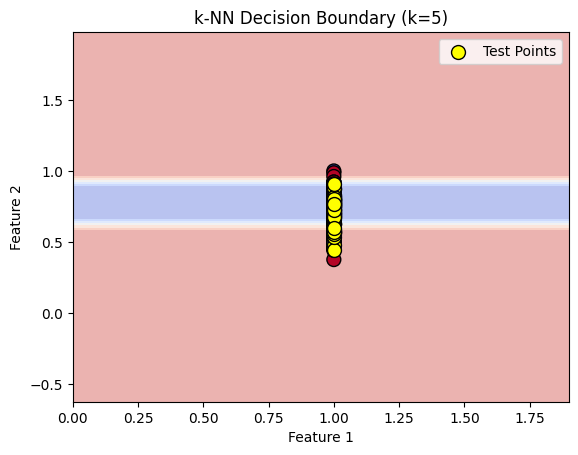

In [16]:

# Your example code
h = 0.1  

# Assuming xtrain and ytrain are already defined
x_min, x_max = xtrain[:, 0].min() - 1, xtrain[:, 0].max() + 1
y_min, y_max = xtrain[:, 1].min() - 1, xtrain[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on each point in the mesh grid
Z = knn(xtrain, ytrain, np.c_[xx.ravel(), yy.ravel()], k)
Z = np.array(Z).reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ytrain, s=100, cmap=plt.cm.coolwarm, edgecolor='k')
plt.scatter(xtest[:, 0], xtest[:, 1], c='yellow', s=100, label='Test Points', edgecolor='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f"k-NN Decision Boundary (k={k})")
plt.legend()
plt.show()

Onley train Data KNN Model


In [36]:
def knntraindata(xtrain, ytrain, xtest, k):
    
      distances = []
      for j in range(len(xtrain)):
        dist = distance_formula(xtrain[j], xtest)
        distances.append((dist, ytrain[j]))
        
        # Sort distances by the first element (the distance)
      distances.sort()
      
        
        # Get the labels of the k nearest neighbors
      k_nearest = distances[:k]
        
      class_votes = {}
      for neighbor in k_nearest:
        
        label = neighbor[1]
       
        if label in class_votes:
          
          class_votes[label] += 1
        else:
          
          class_votes[label] = 1
          
    
    
      return max(class_votes, key=class_votes.get)

In [37]:
testdata = np.array([[1.,0.67532468,1.,0.66666667,0.69,0.39539007,0.5,0.83663366,0.,0.,1.,1.,0.66666667]]).T
k = 3
predictions = knntraindata(xtrain, ytrain, testdata, k)
print("Predictions:", predictions)


Predictions: 0


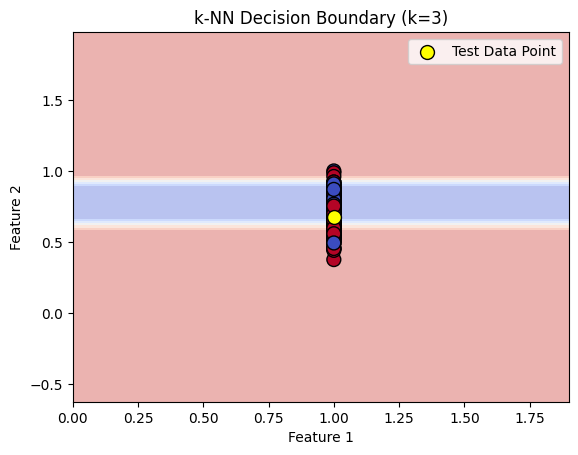

Predictions: 1


In [40]:
xtrain_2d = xtrain[:, :2]

# Create a mesh grid for the first two features
x_min, x_max = xtrain_2d[:, 0].min() - 1, xtrain_2d[:, 0].max() + 1
y_min, y_max = xtrain_2d[:, 1].min() - 1, xtrain_2d[:, 1].max() + 1
h = 0.1  # Step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Flatten the meshgrid and predict the class for each point in the grid
Z = np.array([knntraindata(xtrain_2d, ytrain, np.array([xx_, yy_]), k) 
              for xx_, yy_ in zip(xx.ravel(), yy.ravel())])

# Reshape the predictions to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(xtrain_2d[:, 0], xtrain_2d[:, 1], c=ytrain, s=100, cmap=plt.cm.coolwarm, edgecolor='k')
plt.scatter(testdata[0, 0], testdata[1, 0], c='yellow', s=100, label='Test Data Point', edgecolor='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f"k-NN Decision Boundary (k={k})")
plt.legend()
plt.show()

# Predict on the test data
k = 3
testdata = np.array([[1.,0.67532468,1.,0.66666667,0.69,0.39539007,0.5,0.83663366,0.,0.,1.,1.,0.66666667]])
testdata_2d = testdata[:, :2].T  # Use only the first two features for prediction
predictions = knntraindata(xtrain_2d, ytrain, testdata_2d[0], k)
print("Predictions:", predictions)